In [1]:
%pylab inline
import numpy as np
import torch as th
import torch.nn as nn
import torch.optim as optim
import sklearn.model_selection as selection
import sklearn.metrics as metrics
import sklearn.linear_model as linear
from sklearn import datasets
from sklearn.decomposition import PCA
from scipy.stats import ttest_rel
from sklearn import tree

Populating the interactive namespace from numpy and matplotlib


In [169]:
# load data that we plan to use
X, y = datasets.load_diabetes(return_X_y=True)

In [170]:
nrows, ncols = X.shape # ncols is the number of features

In [171]:
mse = nn.MSELoss()

def loss_function(predictions, actual):
    return mse(predictions, actual)
    

In [172]:
class LinearRegression(nn.Module):
    def __init__(self, n_features):
        super().__init__()
        w = th.tensor(np.random.random(size=n_features), dtype=th.float32)
        c = th.tensor(np.random.random(), dtype=th.float32)
        self.w = nn.Parameter(w)
        self.c = nn.Parameter(c)
    
    def predict(self, X):
        return  self.w @ th.transpose(X, 0, 1) + self.c
    
    # instead of saying model.predict(X)
    # this allows us to say model(X)
    def forward(self, X):
        return self.predict(X)
    
    def loss(self, X, y):
        predictions = self.predict(X)
        return loss_function(predictions, y)

In [173]:
model = LinearRegression(ncols)
lr = 0.3
optimizer = optim.RMSprop(model.parameters(), lr=lr) # Modified SGD
num_iters = 2000
loss_curve = []

def plot_loss(loss_curve):
    plt.plot(list(range(len(loss_curve))), loss_curve)

In [174]:
X_train, X_test, y_train, y_test = selection.train_test_split(X, y, test_size=0.2, shuffle=True)

In [175]:
X_train = th.tensor(X_train, dtype=th.float32)
y_train = th.tensor(y_train, dtype=th.float32)
for i in range(num_iters):
    optimizer.zero_grad()
    loss_value = model.loss(X_train, y_train)
    loss_curve.append(loss_value.data.item())
    loss_value.backward()
    optimizer.step()

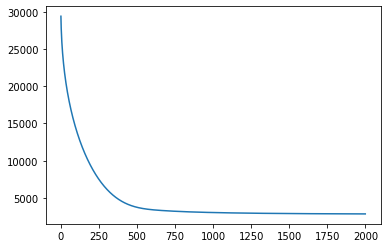

In [176]:
plot_loss(loss_curve)

In [177]:
X_test = th.tensor(X_test, dtype=th.float32)
predictions = model.predict(X_test)
predictions = predictions.detach().numpy()

In [178]:
metrics.mean_squared_error(y_test, predictions)

3035.1698992331785

In [179]:
metrics.mean_absolute_error(y_test, predictions)

45.29251698697551

In [180]:
def mape(actual, predicted):
    diff = np.abs(actual - predicted)
    factor = diff / actual
    return np.mean(factor)

In [181]:
mape(y_test, predictions)

0.4087502925802905

## Linear Layer
There is actually an in-built layer in PyTorch that abstracts away the process of encoding a linear function for us. Let us redefine our model with this layer

In [189]:
class LinearRegression(nn.Module):
    def __init__(self, n_features):
        super().__init__()
        self.l1 = nn.Linear(n_features, 1, bias=True) # n_features inputs, return output with 1 dimensiion, include an intercept
        
    def predict(self, X):
        return self.l1(X).reshape(-1)
    
    # instead of saying model.predict(X)
    # this allows us to say model(X)
    def forward(self, X):
        return self.predict(X)
    
    def loss(self, X, y):
        predictions = self.predict(X)
#         print(predictions)
#         print(y)
        return loss_function(predictions, y)

In [190]:
model = LinearRegression(ncols)
lr = 0.3
optimizer = optim.RMSprop(model.parameters(), lr=lr) # Modified SGD
num_iters = 2000
loss_curve = []


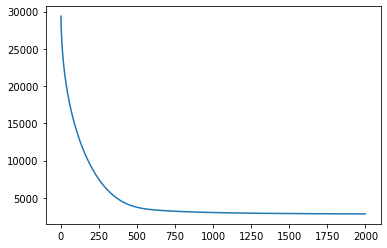

In [191]:
for i in range(num_iters):
    optimizer.zero_grad()
    loss_value = model.loss(X_train, y_train)
    loss_curve.append(loss_value.data.item())
    loss_value.backward()
    optimizer.step()
plot_loss(loss_curve)

In [192]:
predictions = model.predict(X_test)
predictions = predictions.detach().numpy()

In [193]:
metrics.mean_squared_error(y_test, predictions)

3035.3993153789775

In [194]:
metrics.mean_absolute_error(y_test, predictions)

45.29095930463812

In [195]:
mape(y_test, predictions)

0.4085640795648282